##PRACTTICA FINAL - AURELIO GURROLA 2YY

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

##CARGA Y EXPLORACION DE DATOS

Grupo 1 - Primeras Filas
   HorasEstudio  Calificacion
0         20.00         75.94
1         15.60         87.48
2         17.91         79.40
3         20.00         73.37
4         20.00         83.75 

Grupo 1 - Descripción Estadística
       HorasEstudio  Calificacion
count     50.000000      50.00000
mean      14.352000      83.78820
std        4.219174       7.83389
min        3.790000      68.46000
25%       12.032500      78.03500
50%       14.600000      84.49000
75%       17.715000      88.09000
max       20.000000     100.00000 

Grupo 2 - Primeras Filas
   HorasEstudio  Calificacion
0          3.79          40.0
1          6.08          26.1
2          7.17          29.0
3          7.54          31.9
4          8.18          34.8 

Grupo 2 - Descripción Estadística
       HorasEstudio  Calificacion
count     50.000000     50.000000
mean      14.352000     75.912000
std        4.219174     20.668922
min        3.790000     26.100000
25%       12.032500     63.500000
50%   

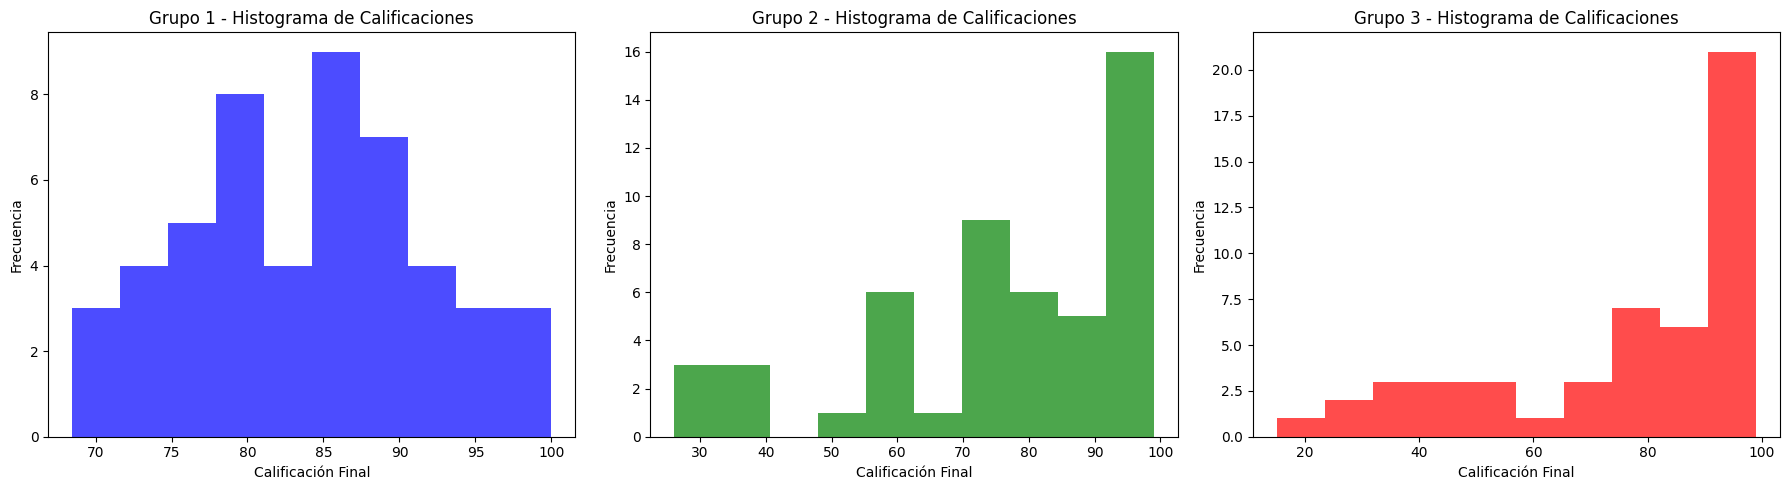

In [ ]:
df1 = pd.read_csv('grupo1.csv')
df2 = pd.read_csv('grupo2.csv')
df3 = pd.read_csv('grupo3.csv')

# Exploración inicial de los datos
print("Grupo 1 - Primeras Filas")
print(df1.head(), "\n")
print("Grupo 1 - Descripción Estadística")
print(df1.describe(), "\n")

print("Grupo 2 - Primeras Filas")
print(df2.head(), "\n")
print("Grupo 2 - Descripción Estadística")
print(df2.describe(), "\n")

print("Grupo 3 - Primeras Filas")
print(df3.head(), "\n")
print("Grupo 3 - Descripción Estadística")
print(df3.describe(), "\n")

# Generar histogramas de las calificaciones finales
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.hist(df1['Calificacion'], bins=10, color='blue', alpha=0.7)
plt.title('Grupo 1 - Histograma de Calificaciones')
plt.xlabel('Calificación Final')
plt.ylabel('Frecuencia')

plt.subplot(1, 3, 2)
plt.hist(df2['Calificacion'], bins=10, color='green', alpha=0.7)
plt.title('Grupo 2 - Histograma de Calificaciones')
plt.xlabel('Calificación Final')
plt.ylabel('Frecuencia')

plt.subplot(1, 3, 3)
plt.hist(df3['Calificacion'], bins=10, color='red', alpha=0.7)
plt.title('Grupo 3 - Histograma de Calificaciones')
plt.xlabel('Calificación Final')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

##MODELO DE REGRESION LINEAL

In [ ]:
for grupo in range(1, 4):
  df = pd.read_csv(f'grupo{grupo}.csv')

  # Entrenar el modelo de regresión lineal
  modelo = LinearRegression().fit(df[['HorasEstudio']], df['Calificacion'])

  # Obtener la pendiente (coeficiente) e intercepto de la línea de regresión
  pendiente, intercepto = modelo.coef_[0], modelo.intercept_

  # Calcular el coeficiente de correlación de Pearson
  coef_corr, _ = pearsonr(df['HorasEstudio'], df['Calificacion'])

  # Resultados
  print(f"Grupo {grupo}: Pendiente: {pendiente:.2f}, Intercepto: {intercepto:.2f}, Coef. Correlación: {coef_corr:.2f}")

Grupo 1: Pendiente: -0.11, Intercepto: 85.31, Coef. Correlación: -0.06
Grupo 2: Pendiente: 4.22, Intercepto: 15.31, Coef. Correlación: 0.86
Grupo 3: Pendiente: 5.29, Intercepto: 0.11, Coef. Correlación: 0.94


##VISUALIZACION DE RESULTADOS

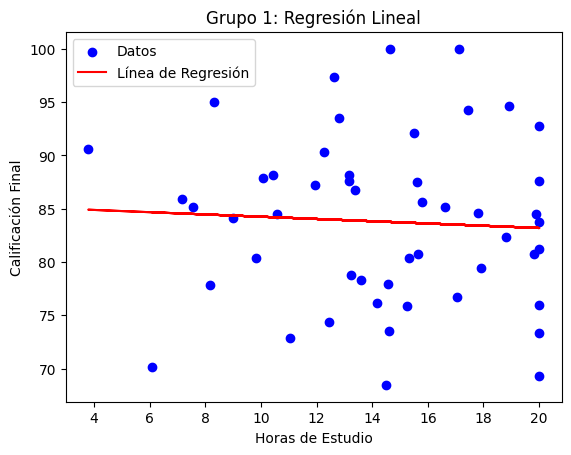

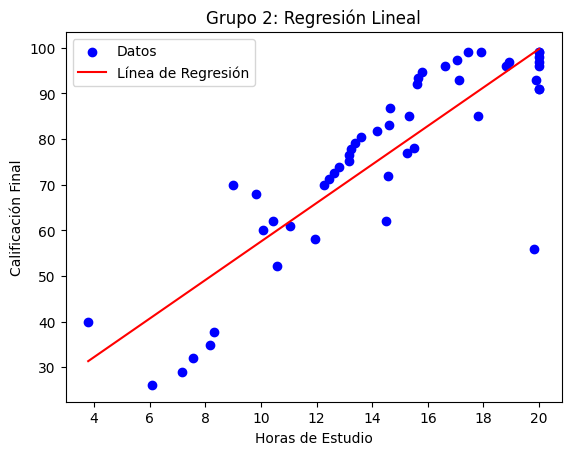

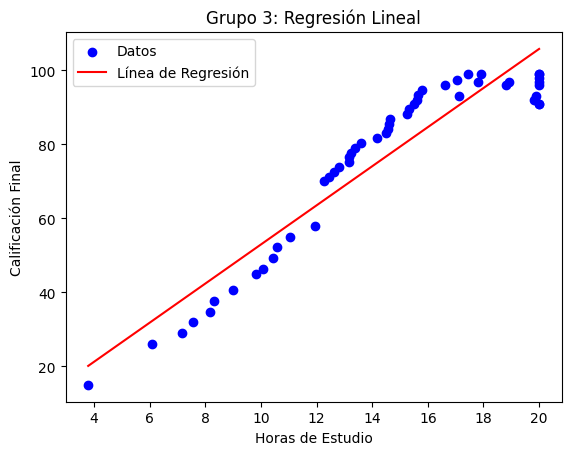

In [ ]:
# Función para graficar datos y la línea de regresión para un grupo
def visualizar_regresion(df, grupo):
    # Entrenar el modelo de regresión lineal
    modelo = LinearRegression().fit(df[['HorasEstudio']], df['Calificacion'])

    # Calcular los valores predichos de la variable objetivo
    y_pred = modelo.predict(df[['HorasEstudio']])

    # Graficar los datos de dispersión
    plt.scatter(df['HorasEstudio'], df['Calificacion'], color='blue', label='Datos')

    # Graficar la línea de regresión
    plt.plot(df['HorasEstudio'], y_pred, color='red', label='Línea de Regresión')

    # Etiquetas y título del gráfico
    plt.xlabel('Horas de Estudio')
    plt.ylabel('Calificación Final')
    plt.title(f'Grupo {grupo}: Regresión Lineal')

    # Mostrar la leyenda
    plt.legend()

    # Mostrar el gráfico
    plt.show()

# Visualizar la regresión lineal para cada grupo de datos
for grupo in range(1, 4):
    # Cargar el archivo CSV del grupo
    df = pd.read_csv(f'grupo{grupo}.csv')

    # Visualizar la regresión lineal para el grupo actual
    visualizar_regresion(df, grupo)

##CALCULO DE CORRELACION

In [ ]:
# Función para calcular el coeficiente de correlación de Pearson
def calcular_correlacion(df):
    coef_corr, _ = pearsonr(df['HorasEstudio'], df['Calificacion'])
    return coef_corr

# Calcular y mostrar el coeficiente de correlación para cada grupo de datos
for grupo in range(1, 4):
    # Cargar el archivo CSV del grupo
    df = pd.read_csv(f'grupo{grupo}.csv')

    # Calcular la correlación
    coef_corr = calcular_correlacion(df)

    # Imprimir el coeficiente de correlación
    print(f"Grupo {grupo}: Coeficiente de Correlación de Pearson: {coef_corr:.2f}")

Grupo 1: Coeficiente de Correlación de Pearson: -0.06
Grupo 2: Coeficiente de Correlación de Pearson: 0.86
Grupo 3: Coeficiente de Correlación de Pearson: 0.94


#INTERPRETACION DE RESULTADOS

##1.- ¿Cuál es la interpretación del coeficiente de regresión en términos de la relación entre el tiempo de estudio y las calificaciones finales?
####R: El coeficiente de regresion nos dice cuanto cambia la calificacion dependiendo de si se aumentan o se restan horas de estudio.

##2.- ¿Cómo se interpreta el coeficiente de correlación en términos de la fuerza y dirección de la relación entre las variables?
####R: El coeficiente de correlacion mide la fuerza y la relaxion entre variables usando los valores "1" y "-1", si el valor se acerca a 1 quiere decir que si una variable aumenta la otra igual lo hara, y si el valor se acerca a -1 entonces sera lo contrario, si una disminuya, la otra tambien, pero si esta vale 0 quiere decir que no hay relacion entre las variables.

##3.- ¿El modelo de regresión lineal es estadísticamente significativo?
#### El modelo de regresion final nos dejo ver que la mayoria se acerca a la linea de regresion, lo cual es bueno, solo en el grupo 1 todos quedaron dispersos, ahi no funcionoi del todo.

##4.- ¿Qué tan confiable es el modelo de regresión para predecir las calificaciones finales de los estudiantes basado en el tiempo de estudio?
#### El modelo de regresion fue preciso con dos de los tres grupos, podemos decir que el modelo de regresion es confiable, 2/3.

##CONCLUSIONES
#### Podemos concluir que la regresion lineal y la correlacion nos puede ayudar a predecir de mejor forma que puede ocurrir en el futuro de ciertas acciones predecibles, como fue este caso de que tan probable es que saque 100 si estudio muchas horas, pudimos deducir que los alumnos que dedicaban mas tiempo al estudio eran los que mejor calificacion sacaban, entonces podemos predecir la calificacion de un alumno mediante sus horas de estudio.
####Esta herramienta no solo nos servira para esto, sino tambien para predecir el futuro de una empresa de acuerdo a las acciones que esta ha hecho, es una herramienta de granayuda al momento de querer predir algo de forma lineal.
